
<h1> Vaccinated Prediction

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import radians, cos, sin, asin, sqrt

<h1> Summary of the models built and its result

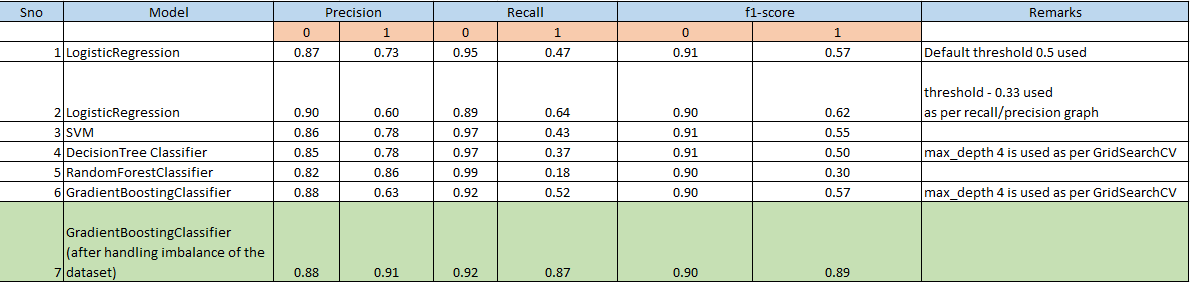

<b> Data Analysis and Model Building

In [2]:
# load the csv file
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.to_csv('h1n1_vaccine_prediction.csv')

In [4]:
# inspect if the data has been loaded correctly
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
# verify the dataframe structure and check if there are any nullable records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
# verify the # of records and columns
df.shape

(26707, 34)

In [7]:
# verify if the provided data set is imbalanced i.e whether target variable has equal representation
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [8]:
#Observatrion it looks data is very much imbalanced, that is we have more representation for not vacinated scenario

In [9]:
df['antiviral_medication'].value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [10]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
df = df.fillna(0)

<b> Handle Categorical Variables (it should be converted as numeric value to build the model)

In [12]:
# analyze various income_level
df['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
0                             4423
Below Poverty                 2697
Name: income_level, dtype: int64

In [13]:
# Handle Income_level categorical variable
dummies = pd.get_dummies(df['income_level'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['income_level'], axis='columns',  inplace = True)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,"<= $75,000, Above Poverty","> $75,000",Below Poverty
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,1,0,0


In [14]:
# Rename column heading
df.rename(columns = {'> $75,000':'Income > $75,000'}, inplace = True)
df.rename(columns = {'Below Poverty':'Income BelowPoverty'}, inplace = True)


In [15]:
# Analyse Sex Variable
df['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [16]:
# Encode sex variable such that Male should be represented as 1 and female should be represented as 0
df['sex_enc'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0 )

In [17]:
# inspect the encoded value
df[['sex','sex_enc']]

,sex,sex_enc
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Female,0
...,...,...
26702,Female,0
26703,Male,1
26704,Female,0
26705,Female,0


In [18]:
# Drop sex variable
df.drop(['sex'], axis='columns',  inplace = True)

In [19]:
# Analyze qualification variable
df['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
0                    1407
Name: qualification, dtype: int64

In [20]:
# Handle qualification variable
dummies = pd.get_dummies(df['qualification'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['qualification'], axis='columns',  inplace = True)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,no_of_children,h1n1_vaccine,"<= $75,000, Above Poverty","Income > $75,000",Income BelowPoverty,sex_enc,12 Years,< 12 Years,College Graduate,Some College
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0,0,0,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0,0,0,1,1,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,1,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0,1,0,0,0,0,0,0,1


In [21]:
# Rename columns
df.rename(columns = {'< 12 Years':'Qualification_12Years'}, inplace = True)
df.rename(columns = {'College Graduate':'Qualification_Grad'}, inplace = True)
df.rename(columns = {'Some College':'Qualification_Other'}, inplace = True)

In [22]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,no_of_children,h1n1_vaccine,"<= $75,000, Above Poverty","Income > $75,000",Income BelowPoverty,sex_enc,12 Years,Qualification_12Years,Qualification_Grad,Qualification_Other
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0,0,0,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0,0,0,1,1,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,1,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0,1,0,0,0,0,0,0,1


In [23]:
# Analyze race variable
df['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [24]:
# Handle race variable
dummies = pd.get_dummies(df['race'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['race'], axis='columns', inplace = True)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,"Income > $75,000",Income BelowPoverty,sex_enc,12 Years,Qualification_12Years,Qualification_Grad,Qualification_Other,Hispanic,Other or Multiple,White
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,1,1,0,0,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1


In [25]:
# Analyze age bracket variable
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [26]:
# Handle age_bracked variable
dummies = pd.get_dummies(df['age_bracket'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['age_bracket'], axis='columns', inplace = True)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,Qualification_12Years,Qualification_Grad,Qualification_Other,Hispanic,Other or Multiple,White,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,1,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,0,1,0,1,0,0


In [27]:
# Analyze Marital status variable
df['marital_status'].value_counts()           

Married        13555
Not Married    11744
0               1408
Name: marital_status, dtype: int64

In [28]:
# Encode marital status variable such that update Married as 1 otherwise 0 
df['marital_status_enc'] = df['marital_status'].apply(lambda x: 1 if x == 'Married' else 0)

In [29]:
# View the encoded value
df[['marital_status','marital_status_enc']]

,marital_status,marital_status_enc
0,Not Married,0
1,Not Married,0
2,Not Married,0
3,Not Married,0
4,Married,1
...,...,...
26702,Not Married,0
26703,Not Married,0
26704,Not Married,0
26705,Married,1


In [30]:
# Drop marital status variable
df.drop(['marital_status'], axis='columns', inplace = True)


In [31]:
# Analyze housing status variable
df['housing_status'].value_counts()

Own     18736
Rent     5929
0        2042
Name: housing_status, dtype: int64

In [32]:
# Encode housing_status variable such at 1 if Own else 0
df['housing_status_enc'] = df['housing_status'].apply(lambda x: 1 if x == 'Own' else 0)

In [33]:
# inspect the encoded values
df[['housing_status','housing_status_enc']]

,housing_status,housing_status_enc
0,Own,1
1,Rent,0
2,Own,1
3,Rent,0
4,Own,1
...,...,...
26702,Own,1
26703,Rent,0
26704,Own,1
26705,Rent,0


In [34]:
# Drop housing_status variable
df.drop(['housing_status'], axis='columns',  inplace = True)

In [35]:
# analyze employment variable
df['employment'].value_counts()

Employed              13560
Not in Labor Force    10231
0                      1463
Unemployed             1453
Name: employment, dtype: int64

In [36]:
# Handle employment variable
dummies = pd.get_dummies(df['employment'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['employment'], axis='columns', inplace = True)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,White,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,marital_status_enc,housing_status_enc,Employed,Not in Labor Force,Unemployed
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,1,0,0,0,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1,0,0,1,1,1,0,0


In [37]:
# Analyze census_msa variable
df['census_msa'].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [38]:
# handle census_msa variable
dummies = pd.get_dummies(df['census_msa'],drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['census_msa'], axis='columns',  inplace = True)
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,45 - 54 Years,55 - 64 Years,65+ Years,marital_status_enc,housing_status_enc,Employed,Not in Labor Force,Unemployed,"MSA, Principle City",Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,1,1,1,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

<h2> Build a model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [41]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,45 - 54 Years,55 - 64 Years,65+ Years,marital_status_enc,housing_status_enc,Employed,Not in Labor Force,Unemployed,"MSA, Principle City",Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,0,1,1,1,0,0,0,0


In [42]:
df.drop('unique_id', axis = 1, inplace=True)

In [43]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,45 - 54 Years,55 - 64 Years,65+ Years,marital_status_enc,housing_status_enc,Employed,Not in Labor Force,Unemployed,"MSA, Principle City",Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,1,1,1,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [45]:
df = df.astype({"Income > $75,000": int })
df = df.astype({"Income BelowPoverty": int })
df = df.astype({"Qualification_12Years": int })




In [46]:
df = df.astype({"Hispanic": int })
df = df.astype({"Other or Multiple": int })
df = df.astype({"White": int })
df = df.astype({"35 - 44 Years": int })
df = df.astype({"45 - 54 Years": int })
df = df.astype({"55 - 64 Years": int })
df = df.astype({"65+ Years": int })
df = df.astype({"Not in Labor Force": int })
df = df.astype({"Unemployed": int })
df = df.astype({"MSA, Principle City": int })
df = df.astype({"Non-MSA": int })


In [47]:
df = df.astype({"Qualification_Other": int })
df = df.astype({"Qualification_Grad": int })


In [48]:
df.shape

(26707, 46)

In [49]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,45 - 54 Years,55 - 64 Years,65+ Years,marital_status_enc,housing_status_enc,Employed,Not in Labor Force,Unemployed,"MSA, Principle City",Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,0,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,1,1,1,0,0,0,0


In [50]:
# Get independent (x) and dependent variable (y) details
x=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [51]:
# do train and test split of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [52]:
#standradize the values to ensure all indpendent variable are on the same scale 
#standardized_x = StandardScaler().fit_transform(x_train)

In [53]:
# fit a model on train data using standradized data
model=LogisticRegression(random_state = 13)
model.fit(x_train,y_train)

C:\Users\rajku\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=13)

In [54]:
# measure the model performance on training data ( accuracy )
model.score(x_train,y_train)

0.8501658286081095

In [55]:
model.score(x_test,y_test)

0.8509921377761138

(0.0, 1.0)

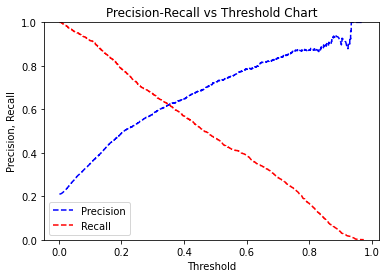

In [56]:
from sklearn.metrics import auc
pred_y=model.predict(x_test) 

probs_y=model.predict_proba(x_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first   column of   array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [57]:
from sklearn.metrics import classification_report
threshold = 0.33

print('Valuation of test data with default threshold:')
LR_Grid_ytest_THR = ((model.predict_proba(x_test)[:, 1])>= threshold).astype(int)
print(classification_report(y_test, model.predict(x_test)))
print("----------------------------------------------------------------------")


print('Valuation for test data only  (new_threshold):')
print(classification_report(y_test, LR_Grid_ytest_THR))

Valuation of test data with default threshold:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6330
           1       0.73      0.47      0.57      1683

    accuracy                           0.85      8013
   macro avg       0.80      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6330
           1       0.60      0.64      0.62      1683

    accuracy                           0.84      8013
   macro avg       0.75      0.76      0.76      8013
weighted avg       0.84      0.84      0.84      8013



<b> Model performance on both test and train data is consistent although there is a scope for improvement hence this could be a reasonably a better model

<h2> SVM Model Building

In [58]:
 from sklearn import svm

In [59]:
clf = svm.SVC(random_state = 13)

In [60]:
# Fit the model using train data
clf.fit(x_train, y_train)

C:\Users\rajku\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=13)

In [61]:
# measure the accuracy of the model score on train data
clf.score(x_train,y_train)

0.8547127420562748

In [62]:
# Measure the accuracy of the model on test data
clf.score(x_test, y_test)

0.8547360539123924

In [63]:

print(classification_report(y_test, clf.predict(x_test)))
print("----------------------------------------------------------------------")


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      6330
           1       0.78      0.43      0.55      1683

    accuracy                           0.85      8013
   macro avg       0.82      0.70      0.73      8013
weighted avg       0.85      0.85      0.84      8013

----------------------------------------------------------------------


<b> Conclusion is SVM model performance is better than Simple Linear Regression model

## Decision Tree Classifier

In [64]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



In [65]:
# Build decison tree model with the depth = 2
clf_1 = DecisionTreeClassifier(max_depth=2,random_state=13)
clf_1.fit(x_train, y_train)
score = clf_1.score(x_train, y_train)
print("Decision Tree with depth 2 score on taining data is",score)

Decision Tree with depth 2 score on taining data is 0.8212795549374131


In [66]:
# Measure the score against test data set
score = clf_1.score(x_test, y_test)
print("Decision Tree with depth 2 score on test data is",score)

Decision Tree with depth 2 score on test data is 0.8249095220267066


<b> Building decision tree with max depth = 30

In [67]:
# Build decison tree model with the depth = 30
clf_2 = DecisionTreeClassifier(max_depth=30,random_state=13)
clf_2.fit(x_train, y_train)
print("Decision Tree with depth 2 score on taining data is",score)

Decision Tree with depth 2 score on taining data is 0.8249095220267066


In [68]:
# with Max depth = 30, the score on test data is 
score = clf_2.score(x_test, y_test)
score

0.7712467240733808

<b>when the decision is built with max depth =30 it seem to have overfit the data and hence the score is low on test data
so we need to find what  is the optimum depth that must be used, GridSearch helps to find it

In [69]:
from sklearn.model_selection import GridSearchCV
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=13),
              param_grid={'max_depth': range(1, 10)},
             cv=5, refit=True)

g_cv.fit(x_train, y_train)
print("The optimum max depth is : ")
g_cv.best_params_



The optimum max depth is : 


{'max_depth': 4}

In [70]:
# with max depth = 4 the score on train data is 
clf_3 = DecisionTreeClassifier(max_depth=4,random_state=13)
clf_3.fit(x_train, y_train)
score = clf_3.score(x_train, y_train)
print("Decision Tree with depth 4 score on taining data is",score)

Decision Tree with depth 4 score on taining data is 0.8414999465069006


In [71]:
# with max depth = 5 the score on test data is 
clf_3.fit(x_test, y_test)
score = clf_3.score(x_test, y_test)
print("Decision Tree with depth 4 score on taining data is",score)

Decision Tree with depth 4 score on taining data is 0.8456258579807813


In [72]:

print(classification_report(y_test, clf_3.predict(x_test)))
print("----------------------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6330
           1       0.78      0.37      0.50      1683

    accuracy                           0.85      8013
   macro avg       0.81      0.67      0.71      8013
weighted avg       0.84      0.85      0.82      8013

----------------------------------------------------------------------


<b> Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth=4, n_jobs = 1)

In [75]:
rnd_clf.fit(x_train,y_train)

<ipython-input-75-199f0996ee66>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(x_train,y_train)


RandomForestClassifier(max_depth=4, n_jobs=1)

In [76]:
rnd_clf.score(x_train,y_train) 

0.8178559965764416

In [77]:
rnd_clf.score(x_test,y_test) 

0.822163983526769

In [78]:

print(classification_report(y_test, rnd_clf.predict(x_test)))
print("----------------------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6330
           1       0.86      0.18      0.30      1683

    accuracy                           0.82      8013
   macro avg       0.84      0.59      0.60      8013
weighted avg       0.83      0.82      0.77      8013

----------------------------------------------------------------------


<AxesSubplot:>

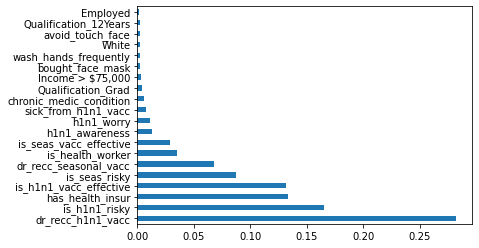

In [79]:
feat_importances = pd.Series(rnd_clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

<b> Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gbmodel = GradientBoostingClassifier(max_depth=4, n_estimators=100, learning_rate=1.0)
gbmodel.fit(x_train,y_train)
gbmodel.score(x_train,y_train)

C:\Users\rajku\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.906868513961699

In [82]:
gbmodel.score(x_test,y_test)

0.834269312367403

In [83]:

print(classification_report(y_test, gbmodel.predict(x_test)))
print("----------------------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6330
           1       0.63      0.52      0.57      1683

    accuracy                           0.83      8013
   macro avg       0.75      0.72      0.73      8013
weighted avg       0.82      0.83      0.83      8013

----------------------------------------------------------------------


<b> Handle imbalanced dataset and then try with all type of models

In [84]:
#!pip install imbalanced-learn

In [85]:
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

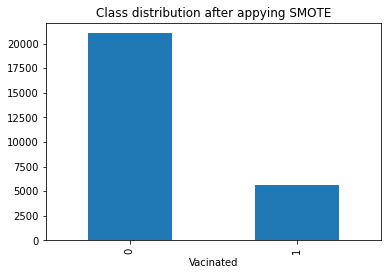

In [86]:
# the current data set has imbalance, i.e it does not have equal representation for both positive and negative cases

df['h1n1_vaccine'].value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Vacinated')
plt.show()

In [88]:
#pip install imbalanced-learn

In [89]:
# using  Synthetic Minority Over-sampling Technique - SMOTE
from imblearn.over_sampling import SMOTE
x_train_b, y_train_b = SMOTE().fit_resample(x_train[col], y_train['h1n1_vaccine'])


NameError: name 'col' is not defined

In [ ]:
y_train_b.value_counts()

In [88]:
# After synthetic data added verify if the data is balanced between postive and negative cases
pd.Series(y_train_b).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Vacinated')
plt.show()

NameError: name 'y_train_b' is not defined

In [236]:
# Train the model with the SMOTE data and verify the score of train dataset
gbmodel.fit(x_train_b,y_train_b)
gbmodel.score(x_train_b,y_train_b)

0.9372236958443855

In [237]:
# Verify the accuracy score of test data set
gbmodel.score(x_test_b,y_test_b)

0.894865718799368

In [238]:
# Verify the classification report
print(classification_report(y_test_b, gbmodel.predict(x_test_b)))
print("----------------------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6330
           1       0.91      0.87      0.89      6330

    accuracy                           0.89     12660
   macro avg       0.90      0.89      0.89     12660
weighted avg       0.90      0.89      0.89     12660

----------------------------------------------------------------------
